# Day 1: Introduction to programming in Python

- Course Repository: [https://github.com/EqiLuo/Climate-Health-Data-Science-Workshop](https://github.com/EqiLuo/Climate-Health-Data-Science-Workshop)


# Some things to note:
- Command vs edit mode `esc`
- Markdown `m` vs code `y` cell
- Shortcuts are your friend: `command shift p`

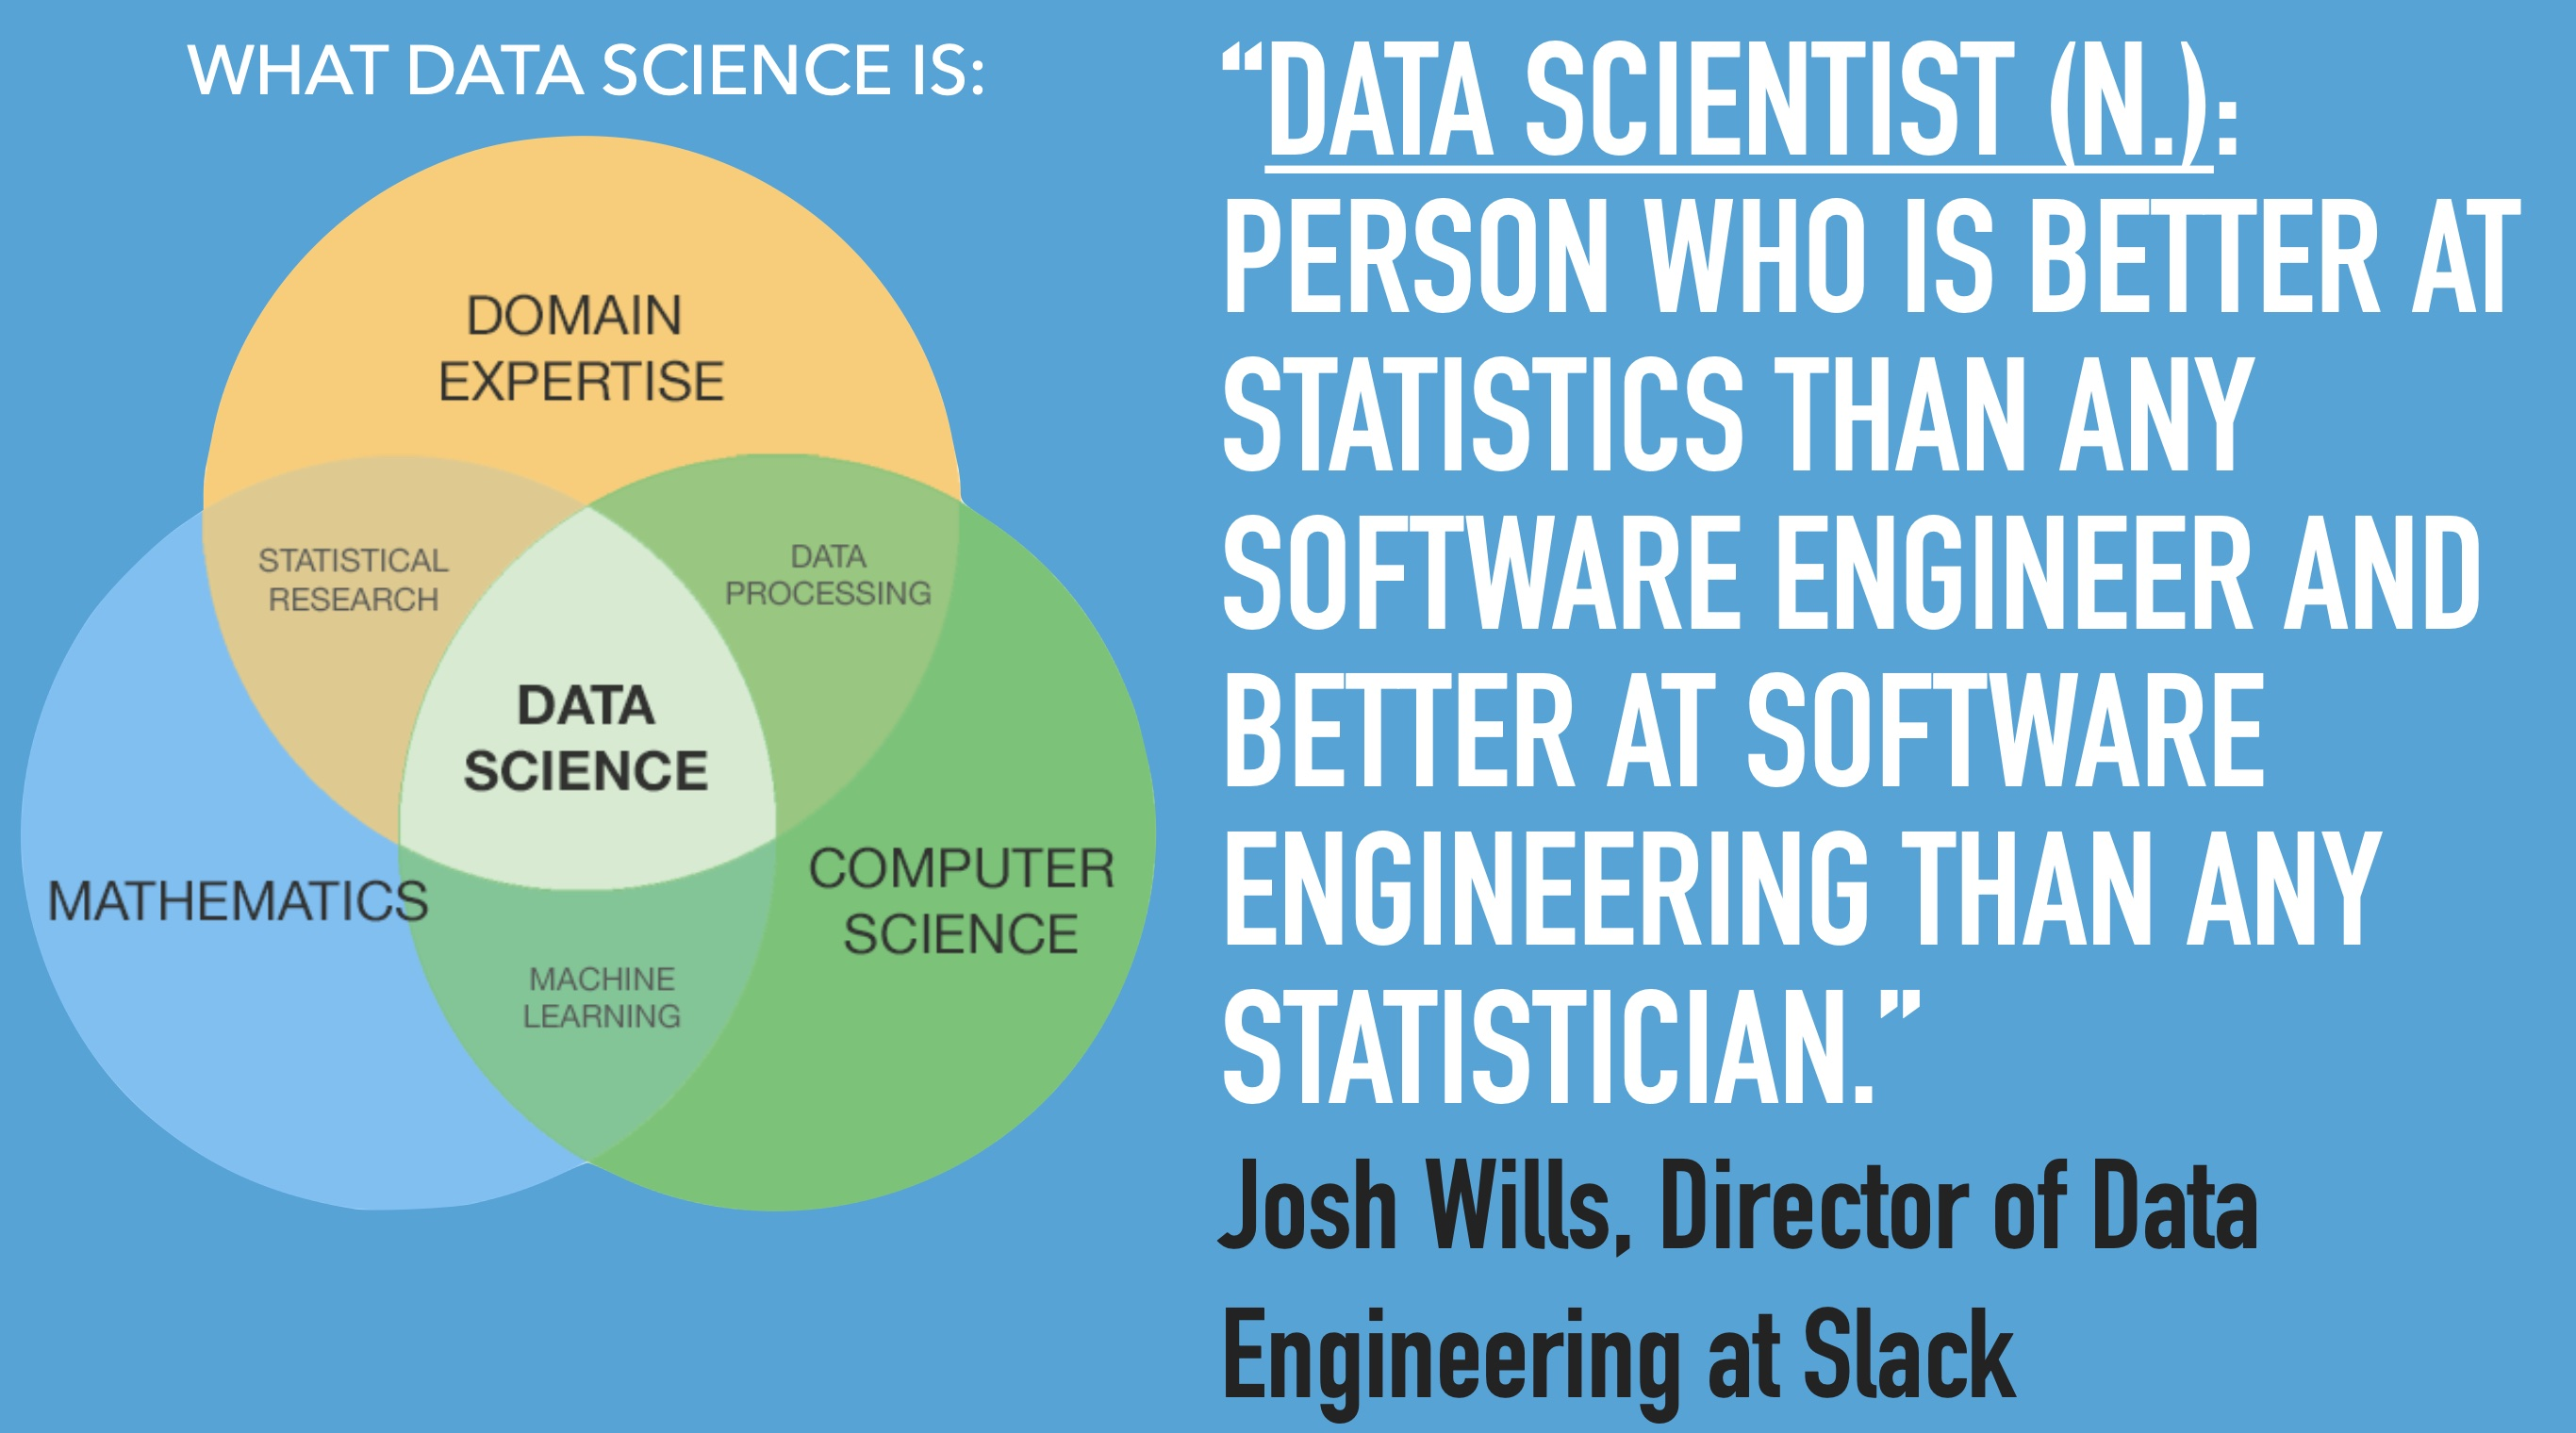

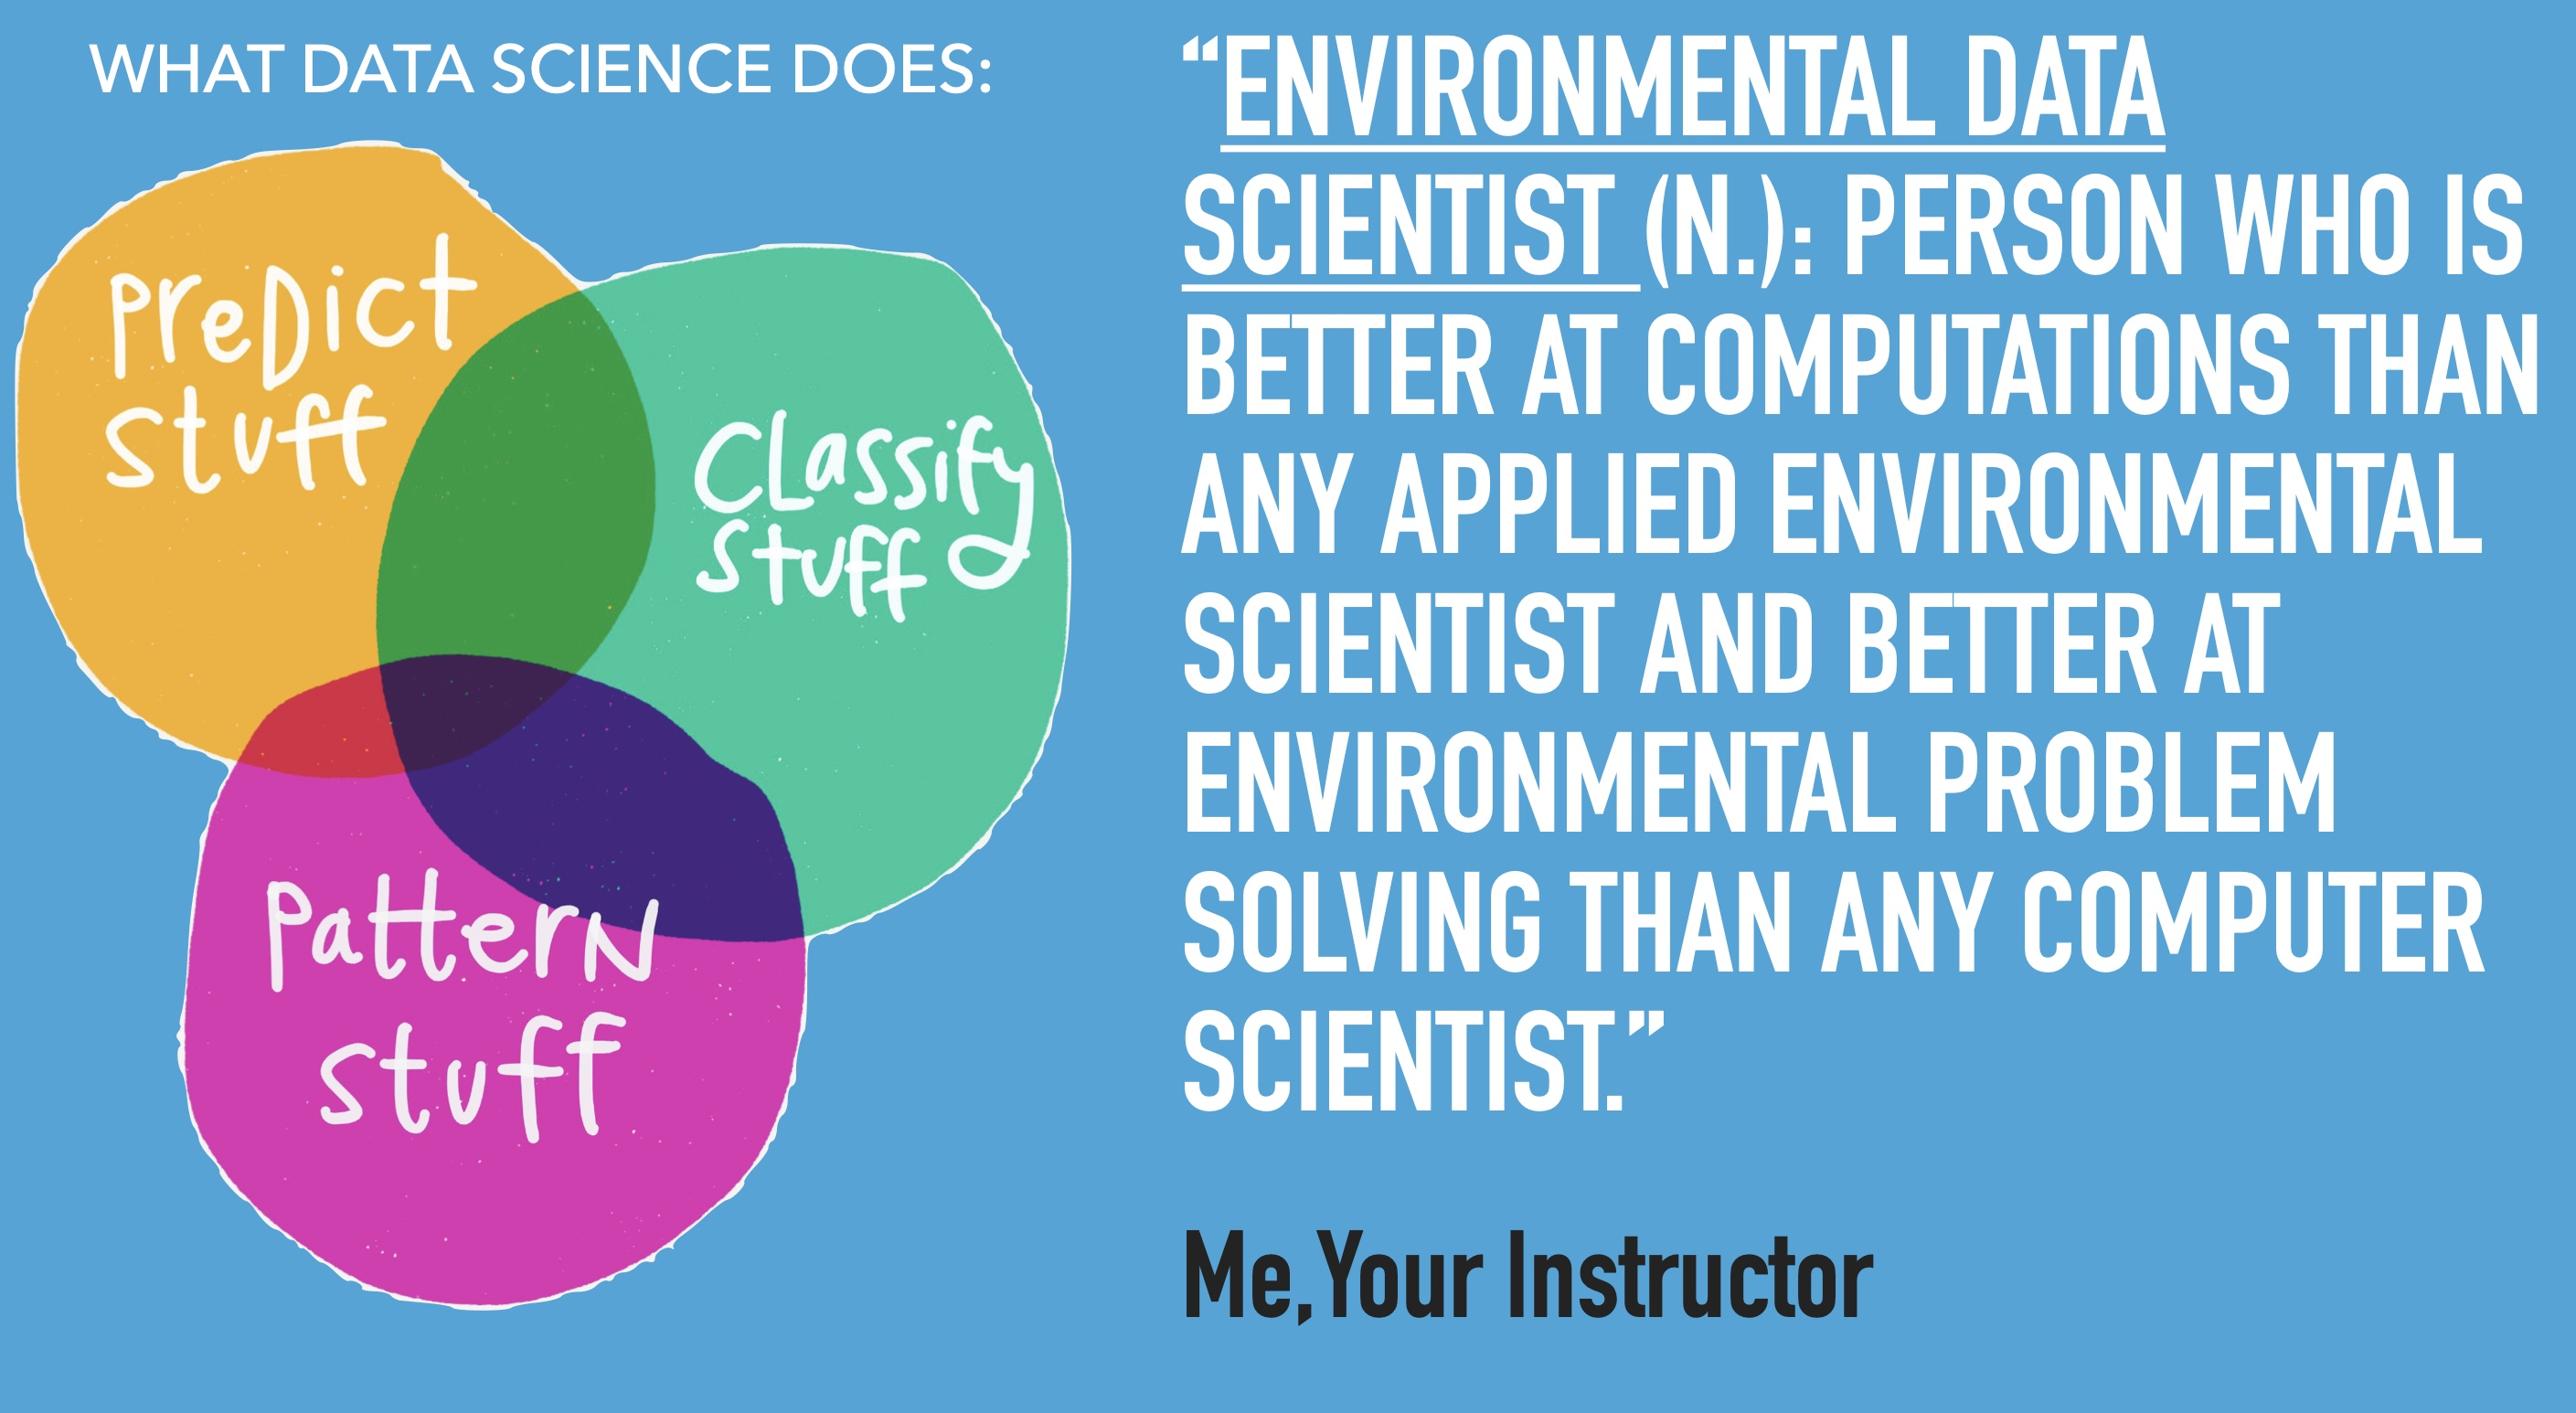

# Why do Data Science? What is the benefit?
- Data tells stories.
- Data is not inherently “truthful”
- Environmental data can be a mess.
- Human data can be even worse.
- Know thy data


# Environmental data can be a mess.
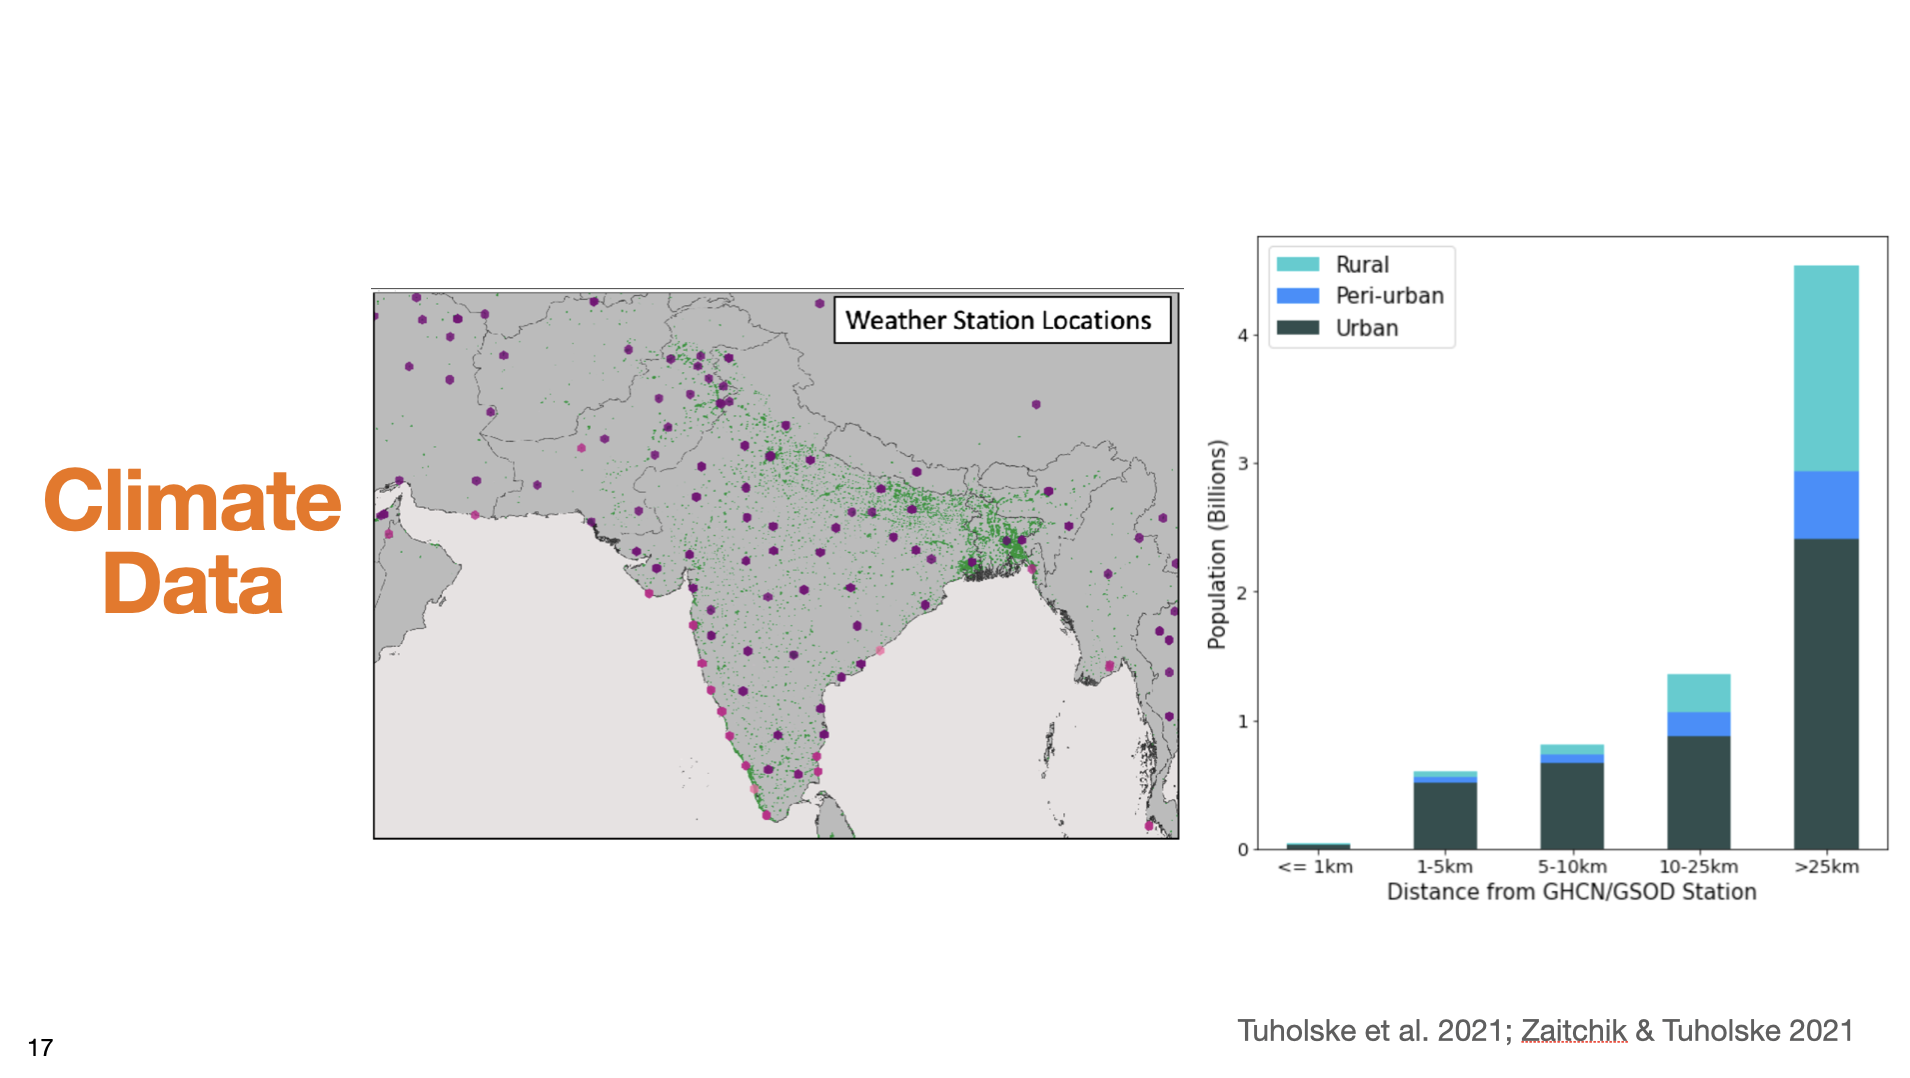


# Environmental data can be a mess.
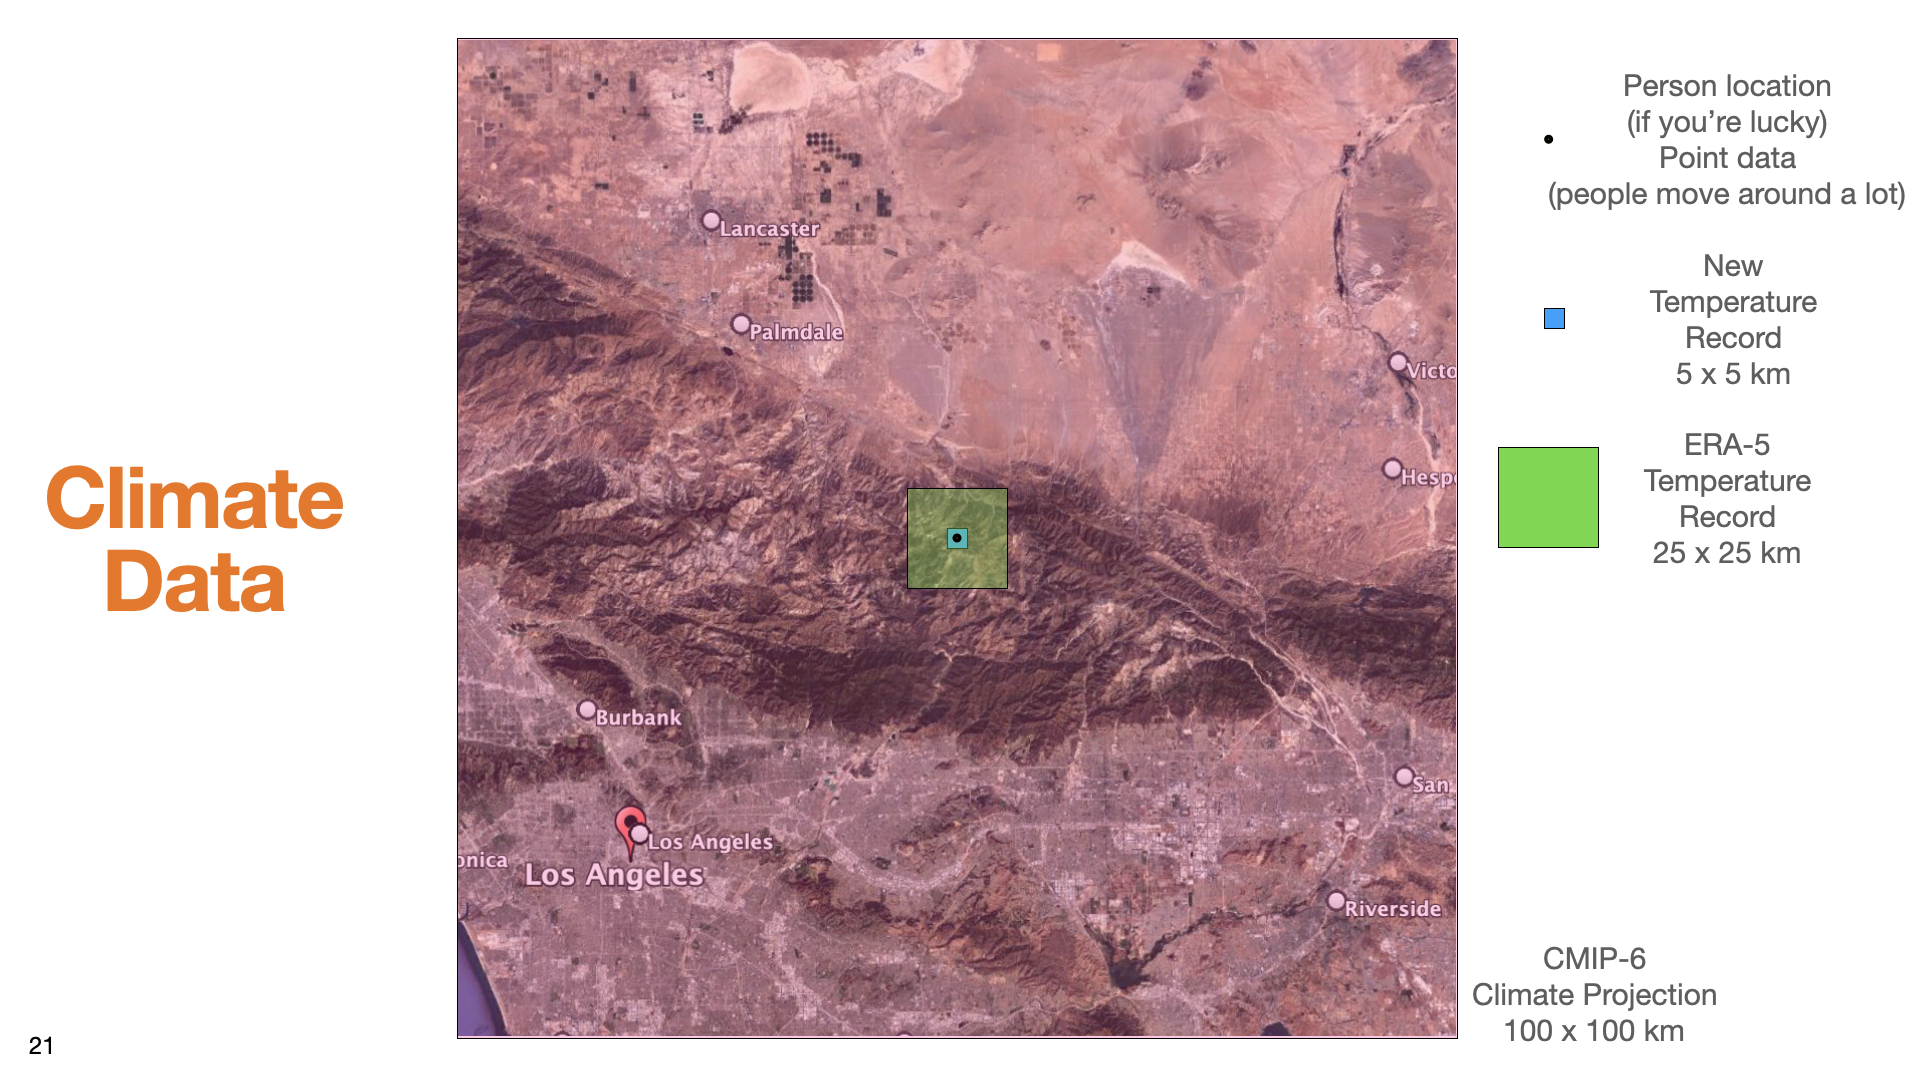

# Human data can be a mess.
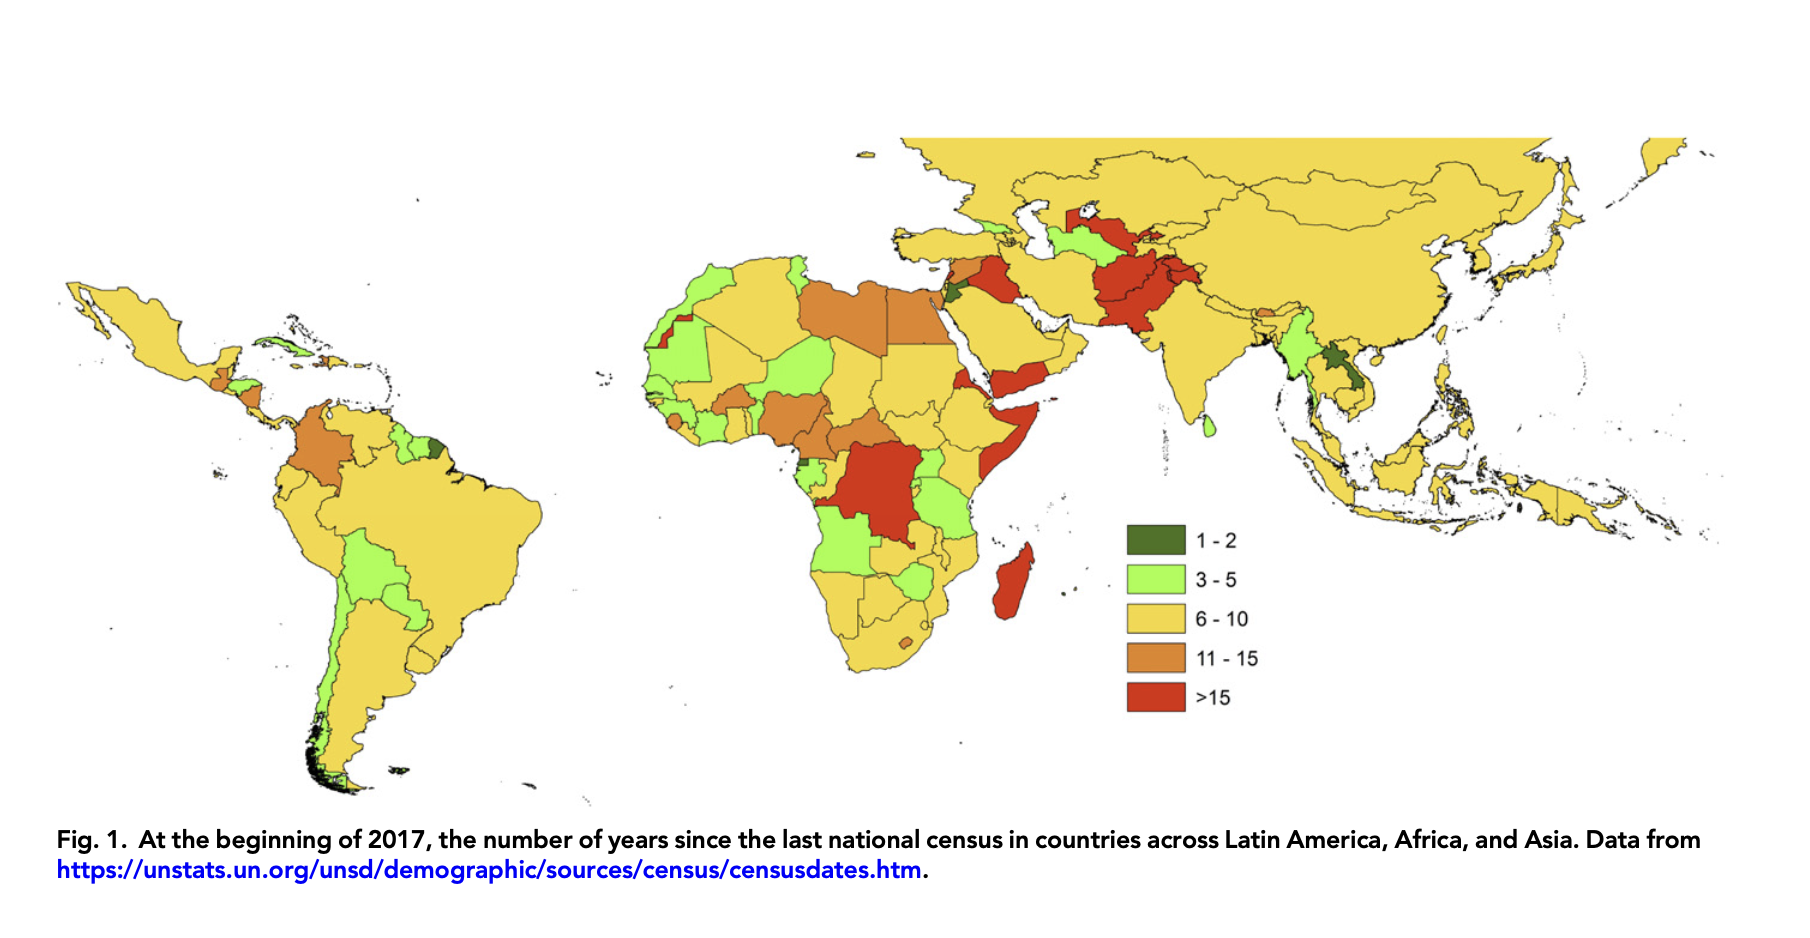

### ... more on this later

> "Python is powerful... and fast;
plays well with others;
runs everywhere;
is friendly & easy to learn;
is Open."

## What is Python?

Python is a *general-purpose, object-oriented programming language* that emphasizes _code readability_ through its generous use of white space. Released in 1989, Python is easy to learn and a favorite of programmers and developers.



### High-level languages
(Python, C, C++, Java, Javascript, R, Pascal)
- Take less time to write
- Shorter and easier to read
- Portable, meaning that they can run on different kinds of computers with few or no modifications.

The engine that translates and runs Python is called the *Python Interpreter*

In [ ]:
"""
Entering code into this notebook cell
and pressing [SHIFT-ENTER] will cause the
python interpreter to execute the code
"""
print("Hello world!")
print("[from this notebook cell]")

print('I love this class')

x = 1
print(x)
x = 2
print(x)

In [ ]:
"""
Alternatively, you can run a
any python script file (.py file)
so long as it contains valid
python code.
"""
!python hello_world.py

### Natural vs. Formal Languages

*Natural languages* are the languages that people speak. They are not designed (although they are subjected to various degrees of "order") and evolve naturally.





*Formal languages* are languages that are designed by people for specific applications.
- Mathematical Notation $E=mc^2$
- Chemical Notation: $\text{H}_2\text{O}$


*Programming languages* are **formal languages that have been designed to express computations**.



**Parsing**: The process of figuring out what the structure of a sentence or statement is (in a natural language you do this subconsciously).


Formal Languages have **strict** syntax for _tokens_ and _structure_:

- Mathematical syntax error: $E=\$m🦆_2$ (bad tokens & bad structure)
- Chemical syntax error: $\text{G}_3\text{Z}$ (bad tokens, but structure is okay)

### Differences between Natural and Formal languages
1. _Ambiguity_:
Natural languages are full of ambiguity, which people parse using contextual clues. Formal languages are nearly or completely unambiguous; any statement has exactly one meaning, regardless of context.
1. _Redundancy_:
In order to make up for ambiguity, natural languages employ lots of redundancy. Formal languages are less redundant and more concise.
1. _Literalness_:
Formal languages mean exactly what they say. Natural languages employ idioms and metaphors.

The inherent differences between familiar natural languages and unfamiliar formal languages creates one of the greatest challenges in learning to code.

### A continuum of formalism
- _poetry_: Words are used for sound and meaning. Ambiguity is common and often deliberate.
- _prose_: The literal meaning of words is important, and the structure contributes meaning. Amenable to analysis but still often ambiguous.
- _program_: Meaning is unambiguous and literal, and can be understood entirely by analysis of the tokens and structure.

#### Strategies for parsing formal languages:
- **Formal languages are very dense**, so it takes longer to read them.
- **Structure is very important**, so it is usually not a good idea to read from top to bottom, left to right. Instead, learn to parse the program in your head, identifying the tokens and interpreting the structure.
- **Details matter**. Little things like spelling errors and bad punctuation, which you can get away with in natural languages, will make a big difference in a formal language.

## Why Python?



[IBM: R vs. Python](https://www.ibm.com/cloud/blog/python-vs-r)


Python is a multi-purpose language with a readable syntax that’s easy to learn. Programmers use Python to delve into data analysis or use machine learning in scalable production environments.

R is built by statisticians and leans heavily into statistical models and specialized analytics. Data scientists use R for deep statistical analysis, supported by just a few lines of code and beautiful data visualizations.

In general, R is better for initial exploratory analyses, statistical analyses, and data visualization.

In general, Python is better for working with APIs (Application Programming Interfaces), writing maintainable, production-ready code, working with a diverse array of data, and building machine learning or AI workflows.

Both languages can _do_ anything.
Most data science teams use both languages.
(and others too: Julia, Matlab, Javascript, Go, Fortran, etc...)

In [ ]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('KHaWVsOgUxU')

### Language Usage by Data Scientists
[Anaconda State of Data Science](https://www.anaconda.com/state-of-data-science-2022)

Data from 2021:
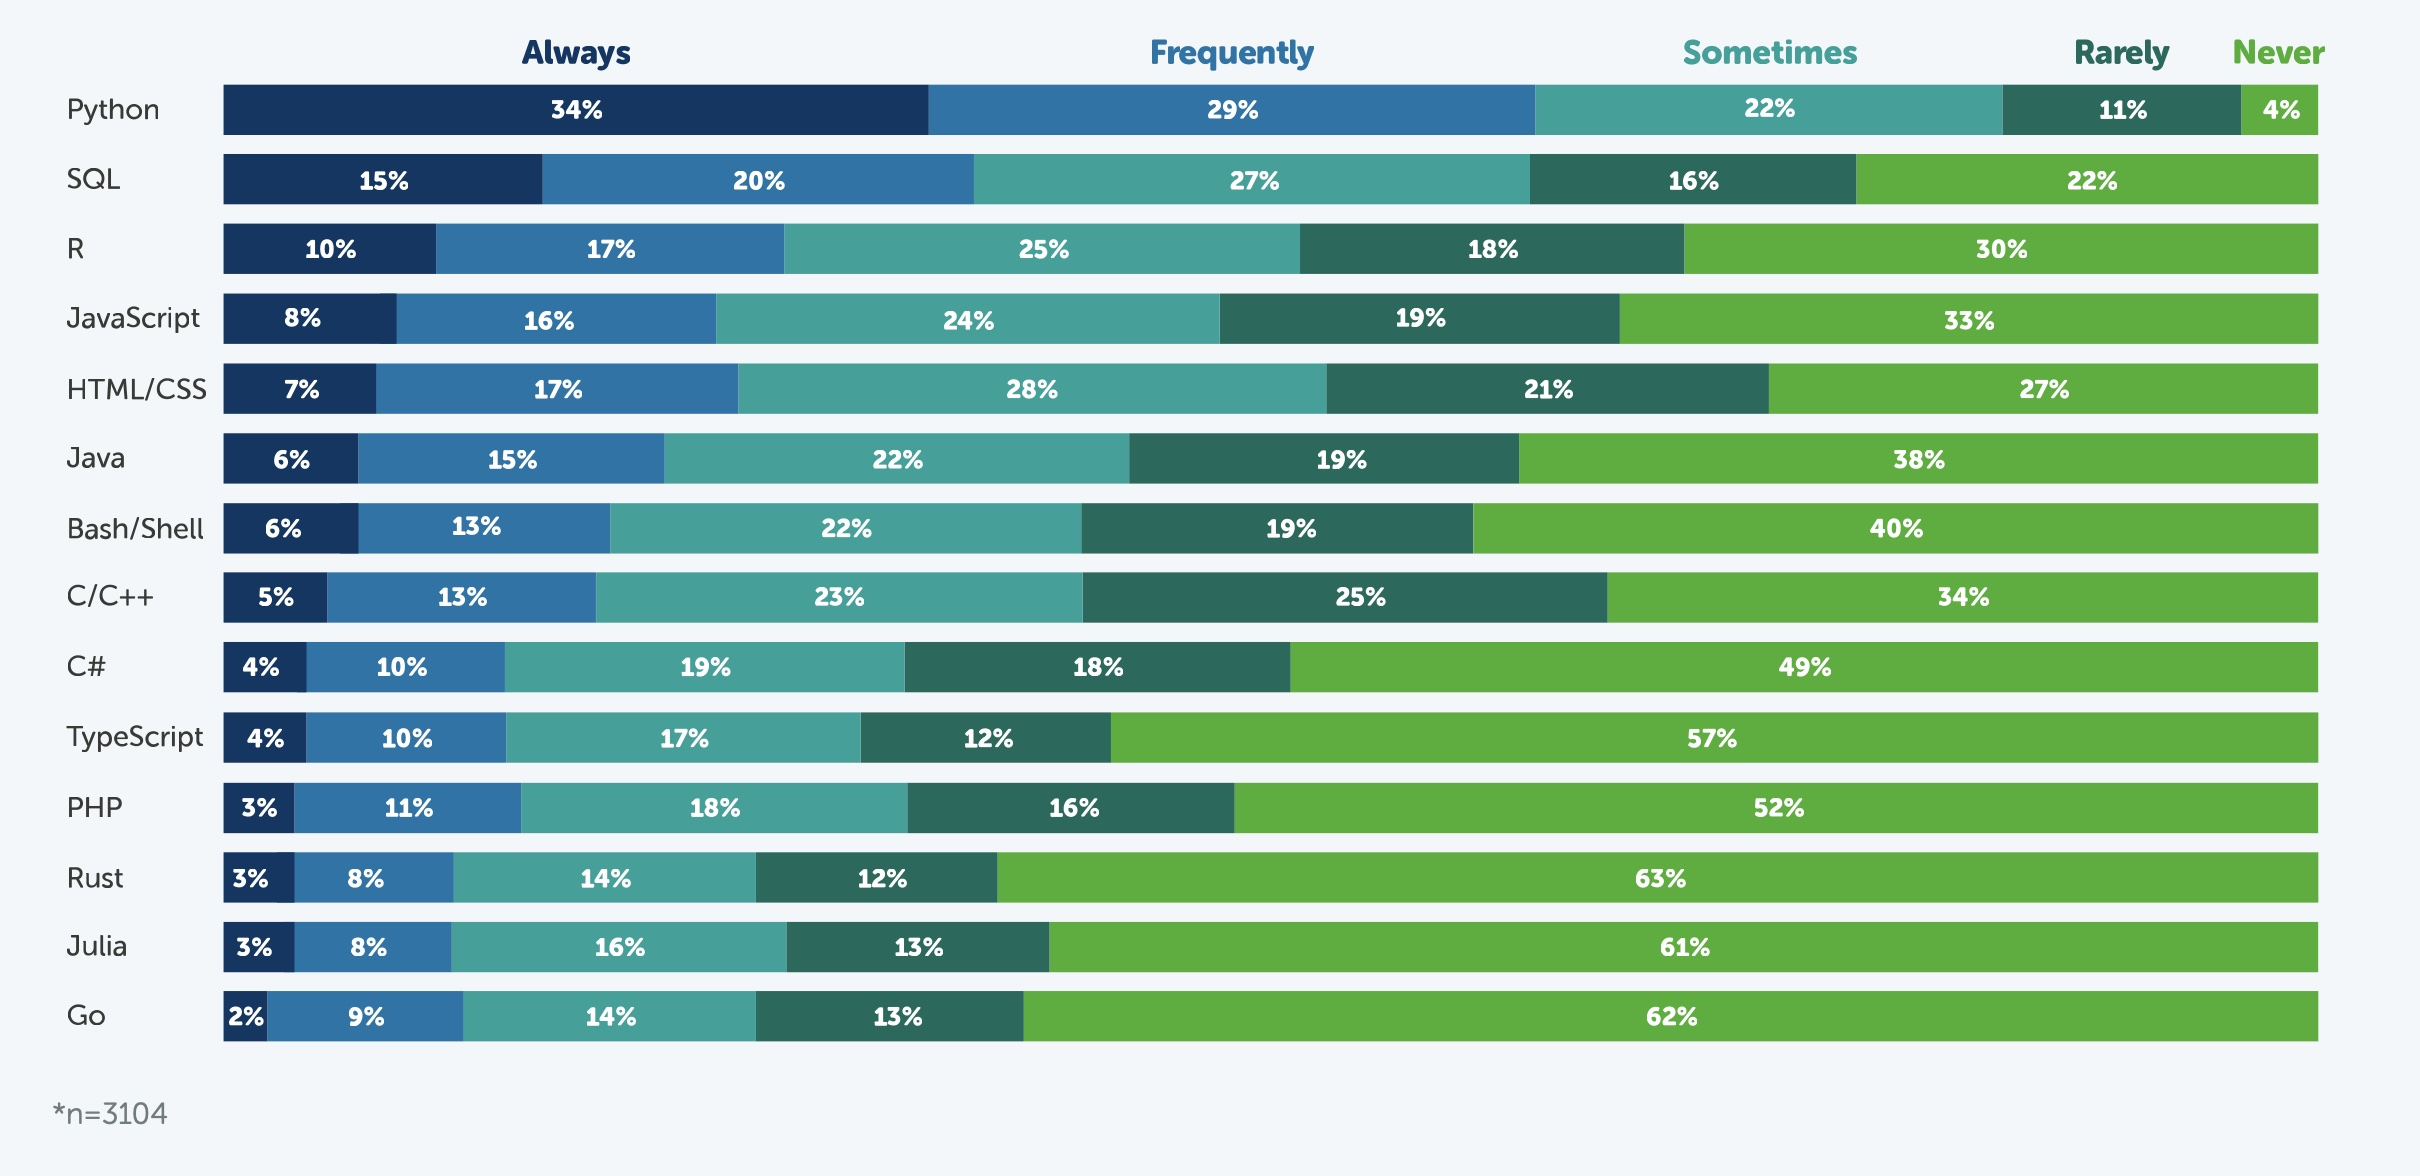

## What about 2022 data?

The data are [available here](https://anaconda.cloud/sods-2022-data-download)...

Let's do some python data science!

In [ ]:
# First, we need to gather our tools (e.g. "packages")
import pandas as pd  # This is the most common data science package used in python!
import matplotlib.pyplot as plt # This is the most widely-used plotting package.

import requests # This package helps us make https requests
import io # This package is good at handling input/output streams

In [ ]:
# Here's the url for the 2022 data that we just looked at:
url = "https://static.anaconda.cloud/content/Anaconda_2022_State_of_Data_Science_+Raw_Data.csv"

# Try to access the file using the requests library
response = requests.get(url)
response.raise_for_status()  # Will raise an HTTPError if the HTTP request returned an unsuccessful status code

# A 200 response code means our request was successful:
print(response)

In [ ]:
# Read the response into a dataframe, using the io.StringIO function to feed the response.txt.
# Also, skip the first three rows
df = pd.read_csv(io.StringIO(response.text), skiprows=3)

# Our very first dataframe!
df.head(1)

# Jupyter notebook cells only output the last value requested...

In [ ]:
# Read the response into a dataframe, using the io.StringIO function to feed the response.txt.
# Also, skip the first three rows
df = pd.read_csv(io.StringIO(response.text), skiprows=3)

# Our very first dataframe!
df.head()

# Jupyter notebook cells only output the last value... unless you use print commands!
print(f'Number of survey responses: {len(df)}')
print(f'Number of survey questions: {len(df.columns)}')

In [ ]:
# 1. Filter the dataframe to only the questions about programming language usage, and
filtered_df = df.filter(like='How often do you use the following languages?').copy() # Use copy to force python to make a new copy of the data, not just a reference to a subset.

# 2. Rename the columns to just be the programming languages, without the question preamble
filtered_df.rename(columns=lambda x: x.split('-')[-1].strip() if '-' in x else x, inplace=True)


In [ ]:
# Calculate the percentage of each response for each language
percentage_df = filtered_df.apply(lambda x: x.value_counts(normalize=True).fillna(0) * 100).transpose()

# Remove the last row, which is the "Other" category
percentage_df = percentage_df[:-1]

# Sort the DataFrame based on the 'Always' responses
sorted_percentage_df = percentage_df.sort_values(by='Always', ascending=True)

In [ ]:
# Let's get ready to plot the 2022 data...
from IPython.display import display

# We are going to use the display command to update our figure over multiple cells.
# This usually isn't necessary, but it's helpful here to see how each set of commands updates the figure

# Define the custom order for plotting
order = ['Always', 'Frequently', 'Sometimes', 'Rarely', 'Never']

colors = {
    'Always': (8/255, 40/255, 81/255),       # Replace R1, G1, B1 with the RGB values for 'Dark Blue'
    'Frequently': (12/255, 96/255, 152/255),   # Replace R2, G2, B2 with the RGB values for 'Light Ocean Blue'
    'Sometimes': (16/255, 146/255, 136/255),    # and so on...
    'Rarely': (11/255, 88/255, 73/255),
    'Never': (52/255, 163/255, 32/255)
}

In [ ]:
# Make the plot
fig, ax = plt.subplots(figsize=(10, 7))
sorted_percentage_df[order].plot(kind='barh', stacked=True, ax=ax, color=[colors[label] for label in order])
ax.set_xlabel('Percentage')
ax.set_title('Frequency of Language Usage, 2022',y=1.05)

plt.show() # This command draws our figure.

In [ ]:
# Add labels across the top, like in the original graph

# Get the patches for the top-most bar
num_languages = len(sorted_percentage_df)

patches = ax.patches[num_languages-1::num_languages]
# Calculate the cumulative width of the patches for the top-most bar
cumulative_widths = [0] * len(order)
widths = [patch.get_width() for patch in patches]
for i, width in enumerate(widths):
    cumulative_widths[i] = width + (cumulative_widths[i-1] if i > 0 else 0)

# Add text labels above the bars
for i, (width, label) in enumerate(zip(cumulative_widths, order)):
    # Get the color of the current bar segment
    # Calculate the position for the text label
    position = width - (patches[i].get_width() / 2)
    # Add the text label to the plot
    # Adjust the y-coordinate for the text label
    y_position = len(sorted_percentage_df) - 0.3  # Adjust the 0.3 value as needed
    ax.text(position, y_position, label, ha='center', color=colors[label], fontweight='bold')

# Remove the legend
ax.legend().set_visible(False)

#plt.show()
display(fig) # This command shows our updated figure (we can't re-use "plt.show()")

In [ ]:
# Add percentage values inside each patch
for patch in ax.patches:
    # Get the width and height of the patch
    width, height = patch.get_width(), patch.get_height()

    # Calculate the position for the text label
    x = patch.get_x() + width / 2
    y = patch.get_y() + height / 2

    # Get the percentage value for the current patch
    percentage = "{:.0f}%".format(width)

    # Add the text label to the plot
    ax.text(x, y, percentage, ha='center', va='center', color='white', fontweight='bold')

display(fig) # Let's see those nice text labels!

In [ ]:
# Clean up the figure to remove spines and unecessary labels/ticks, etc..

# Remove x-axis label
ax.set_xlabel('')

# Remove the spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove the y-axis tick marks
ax.tick_params(axis='y', which='both', length=0)

# Remove the x-axis tick marks and labels
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

display(fig) # Now 100% less visually cluttered!

# What python?

### Python Developer's Survey 2022
[JetBrains, Inc.](https://lp.jetbrains.com/python-developers-survey-2022/)
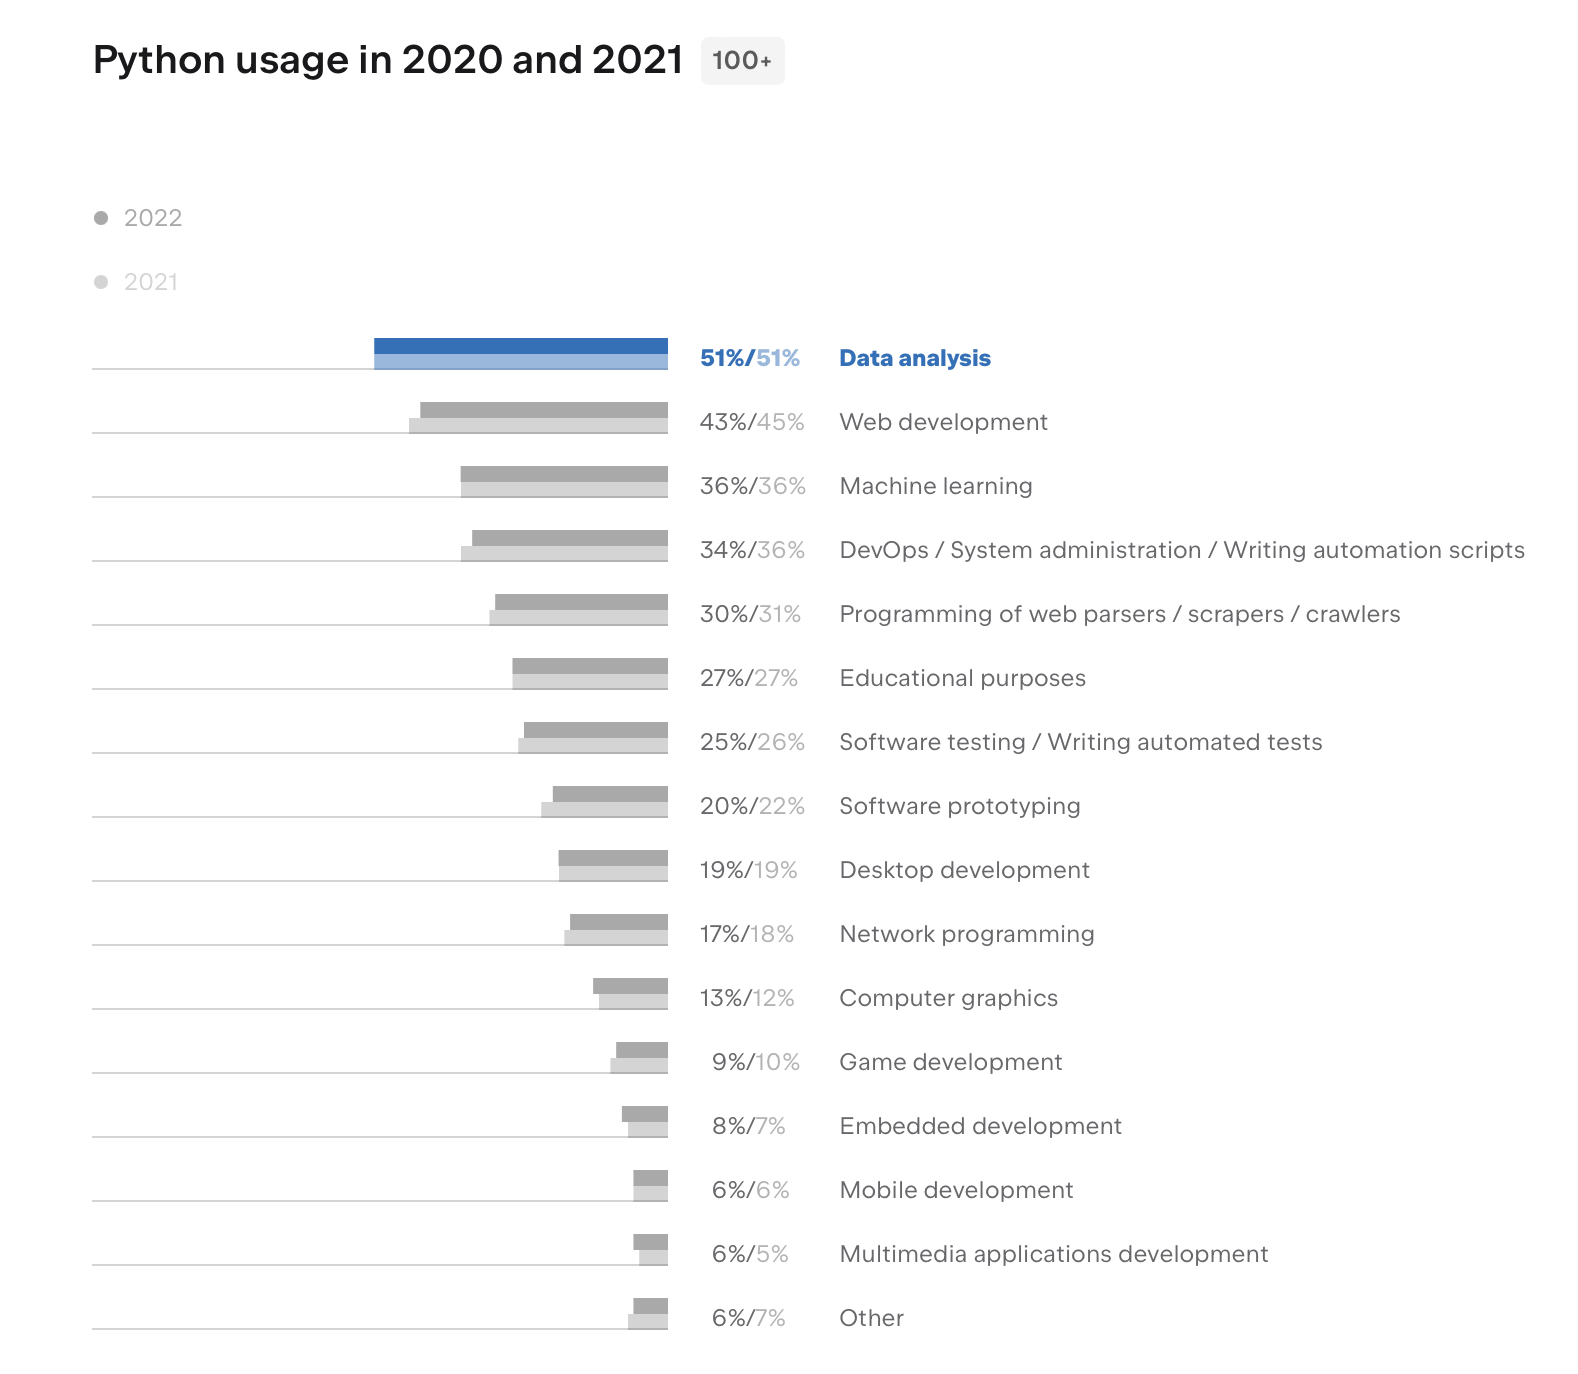
Data is [here](https://drive.google.com/drive/folders/17jyWjMslux6N921jXFI7-kdZzJ4L6vCI)

### Activities of Data Analysis...
[Anaconda State of Data Science](https://www.anaconda.com/resources/whitepaper/state-of-data-science-report-2022!)
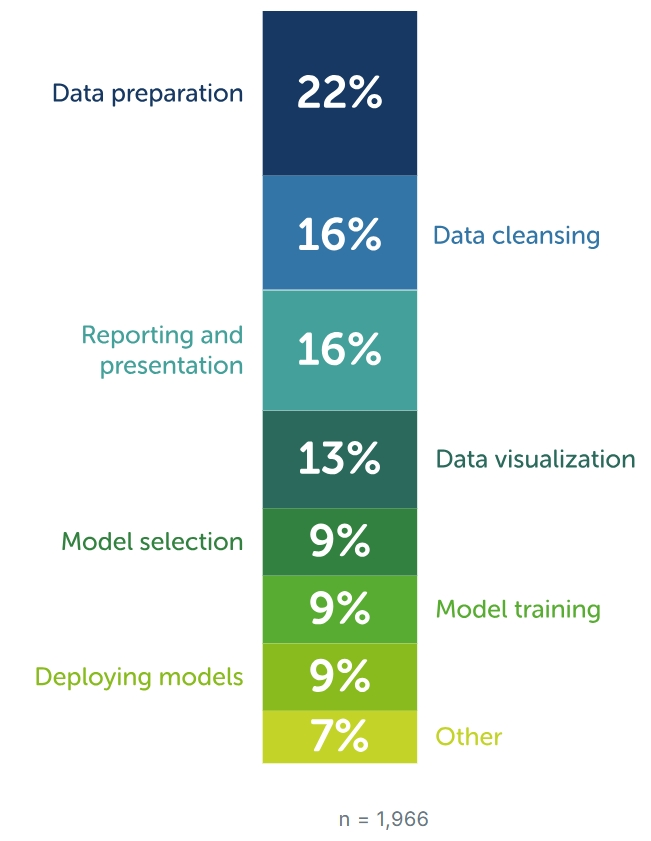

# How Python?


Writing code requires an editor.

Running code requires an interpreter.

How you setup your editor and your interpreter can vary widely...

- On your machine?
- On a server?
- In the cloud?
- In your browser?
- In a file?

### Python Developer's Survey 2022
[JetBrains, Inc.](https://lp.jetbrains.com/python-developers-survey-2022/)
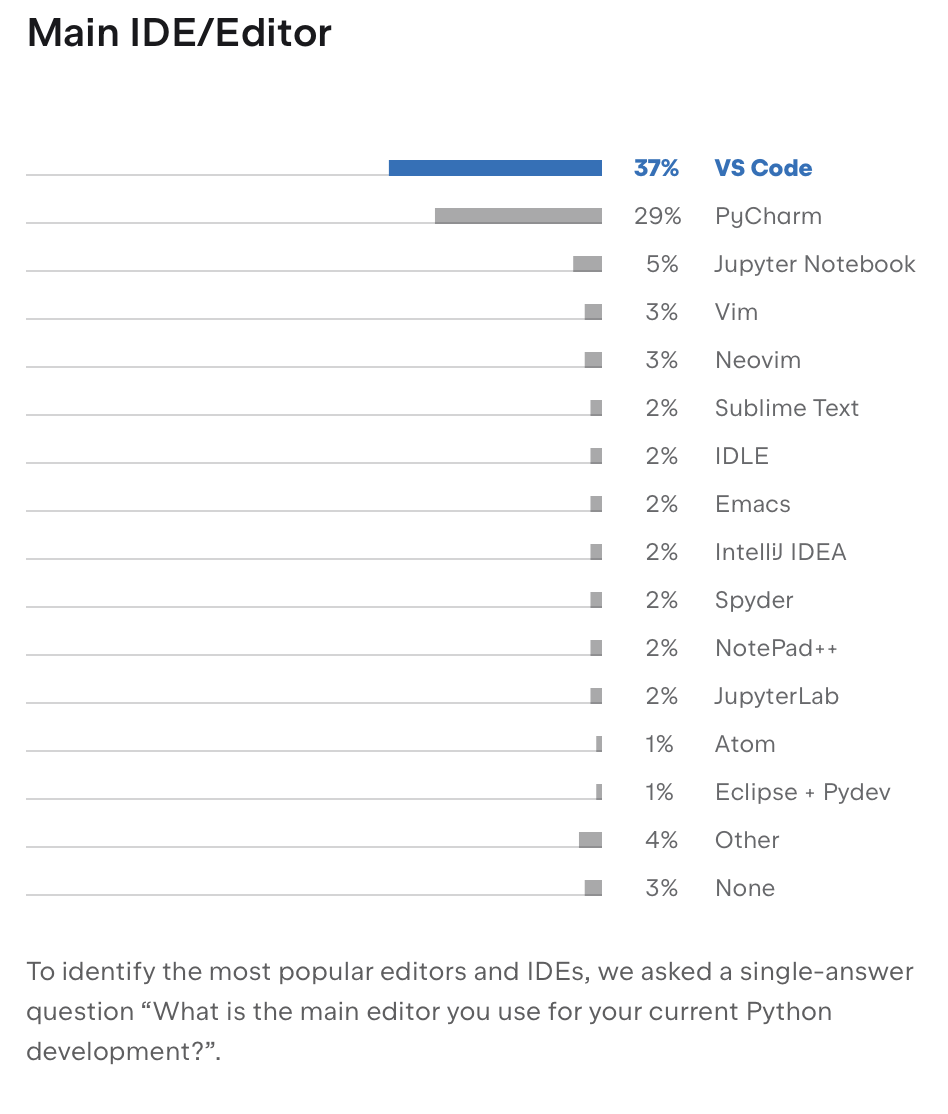

### IDS = Integrated development environment ###

# Why Open Source Code?
- Join a global community
- Free knowledge
- The Feds want us to: [TRANSFORM TO OPEN SCIENCE](https://nasa.github.io/Transform-to-Open-Science/)
- Ethical: Reproducable, Transparent, Accessable to All (kinda)
- Great resources: Google + Stack Exchange/Overflow
- More fun, faster.


# Workflow for GPHY 491-591

1. Learn Computer Science 101
1. Github
1. Unix Shell
1. Learn how to manage python working environments using [conda](https://docs.conda.io/en/latest/)
1. Focus initially on Jupyter notebooks...
1. Start writing code in an IDE using [VSCode](https://code.visualstudio.com).
1. But also explore using .py files and other tools for developing your own functions and re-usable code.

By end of this course, you will have the ability to develop maintanable, repeatable python code that anyone can use!

# Computer Science 101: What is a Computer?
![](assets/Computer-Memory-Hierarchy.jpg)

# Random Access Memory (RAM) vs. Hard Drive Storage?
###  ... I have 64 GB of RAM and 1 TB SSD ... "WTF does that mean??"  
![](assets/memory-vs-storage.png)

# Computer Science 101: What is a Computer?
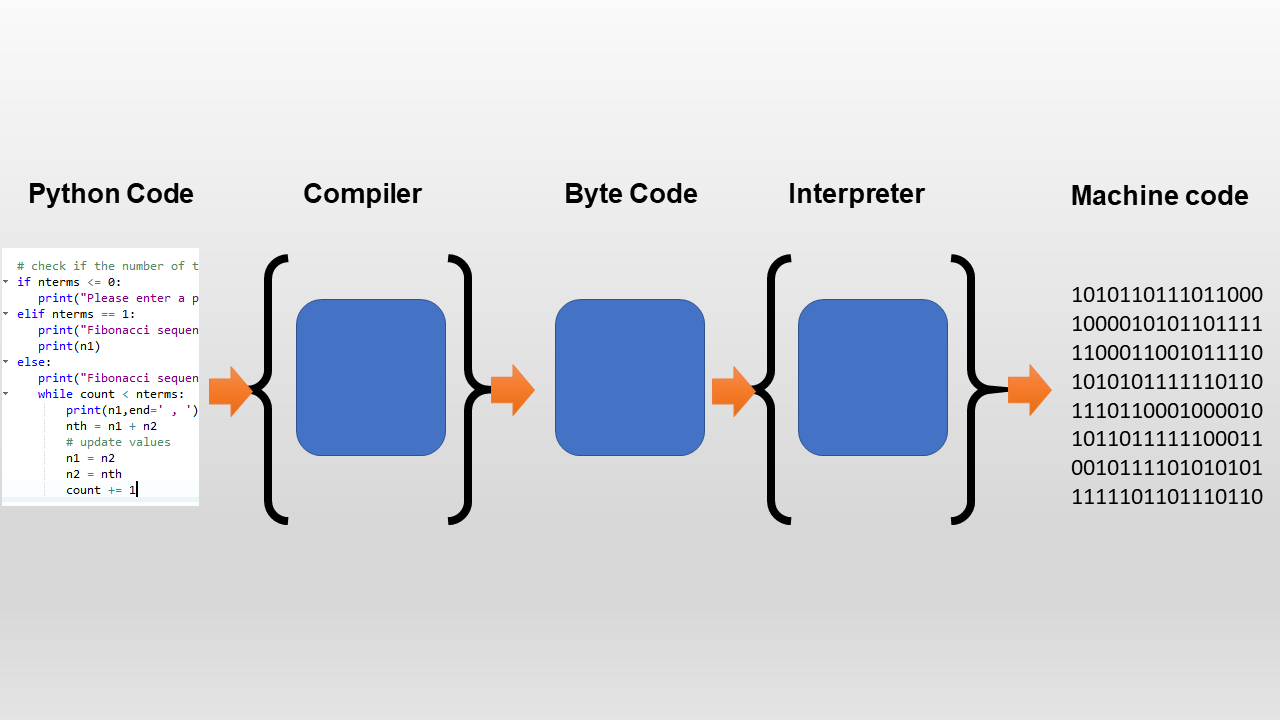

# RAM

- RAM is literally randomly used within a computer program.
- When using data for computation, your CPU gets a pool of RAM that track tracks of during opperations.
- The data on this screen is currently "in memory" ... until it is released.
- More on RAM later, but understanding the basics of RAM is _very important for data science_

# Hard Drive Storage + File System + CPU/GPU
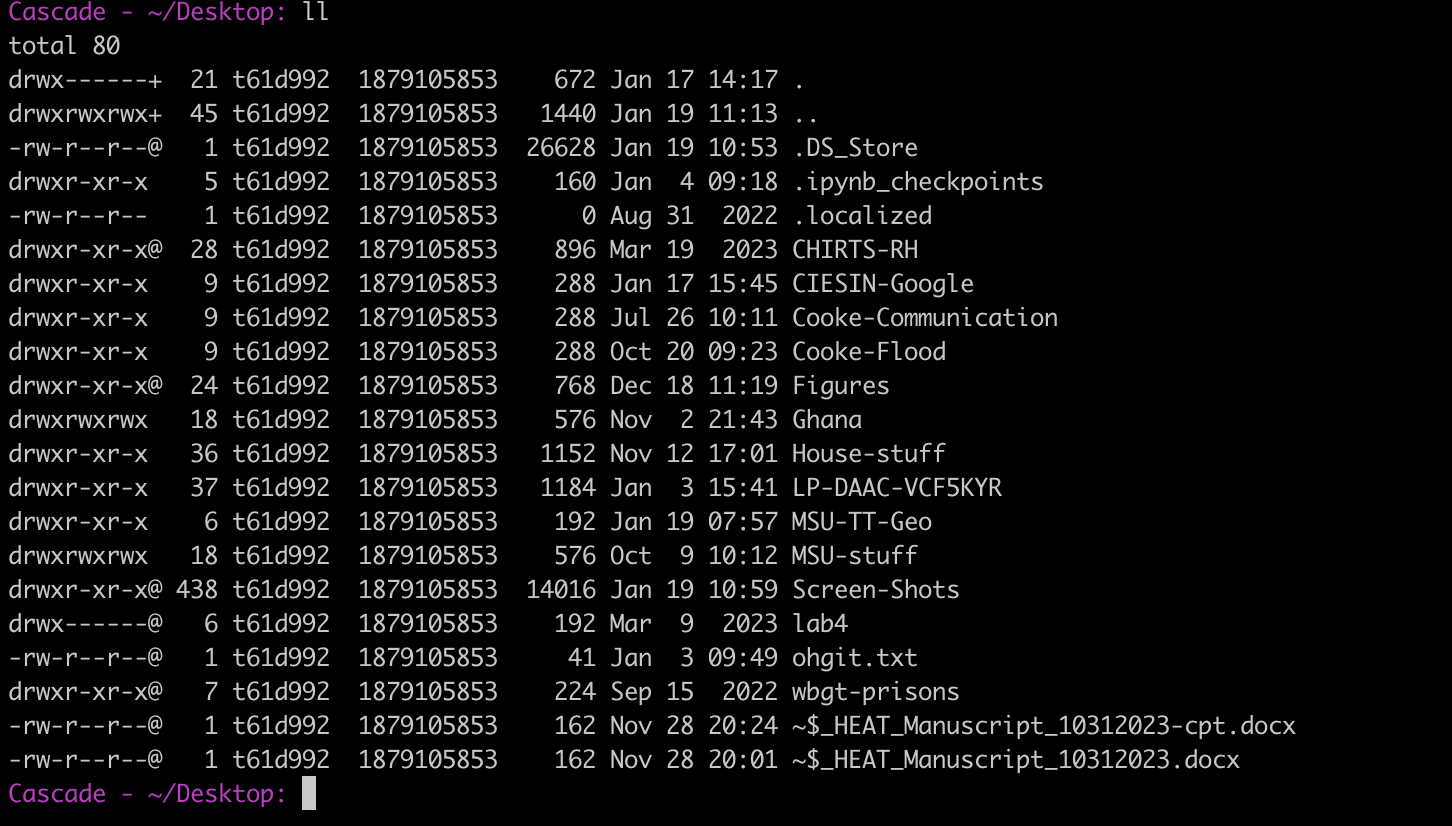

# Hard Drive Storage + File System + CPU/GPU
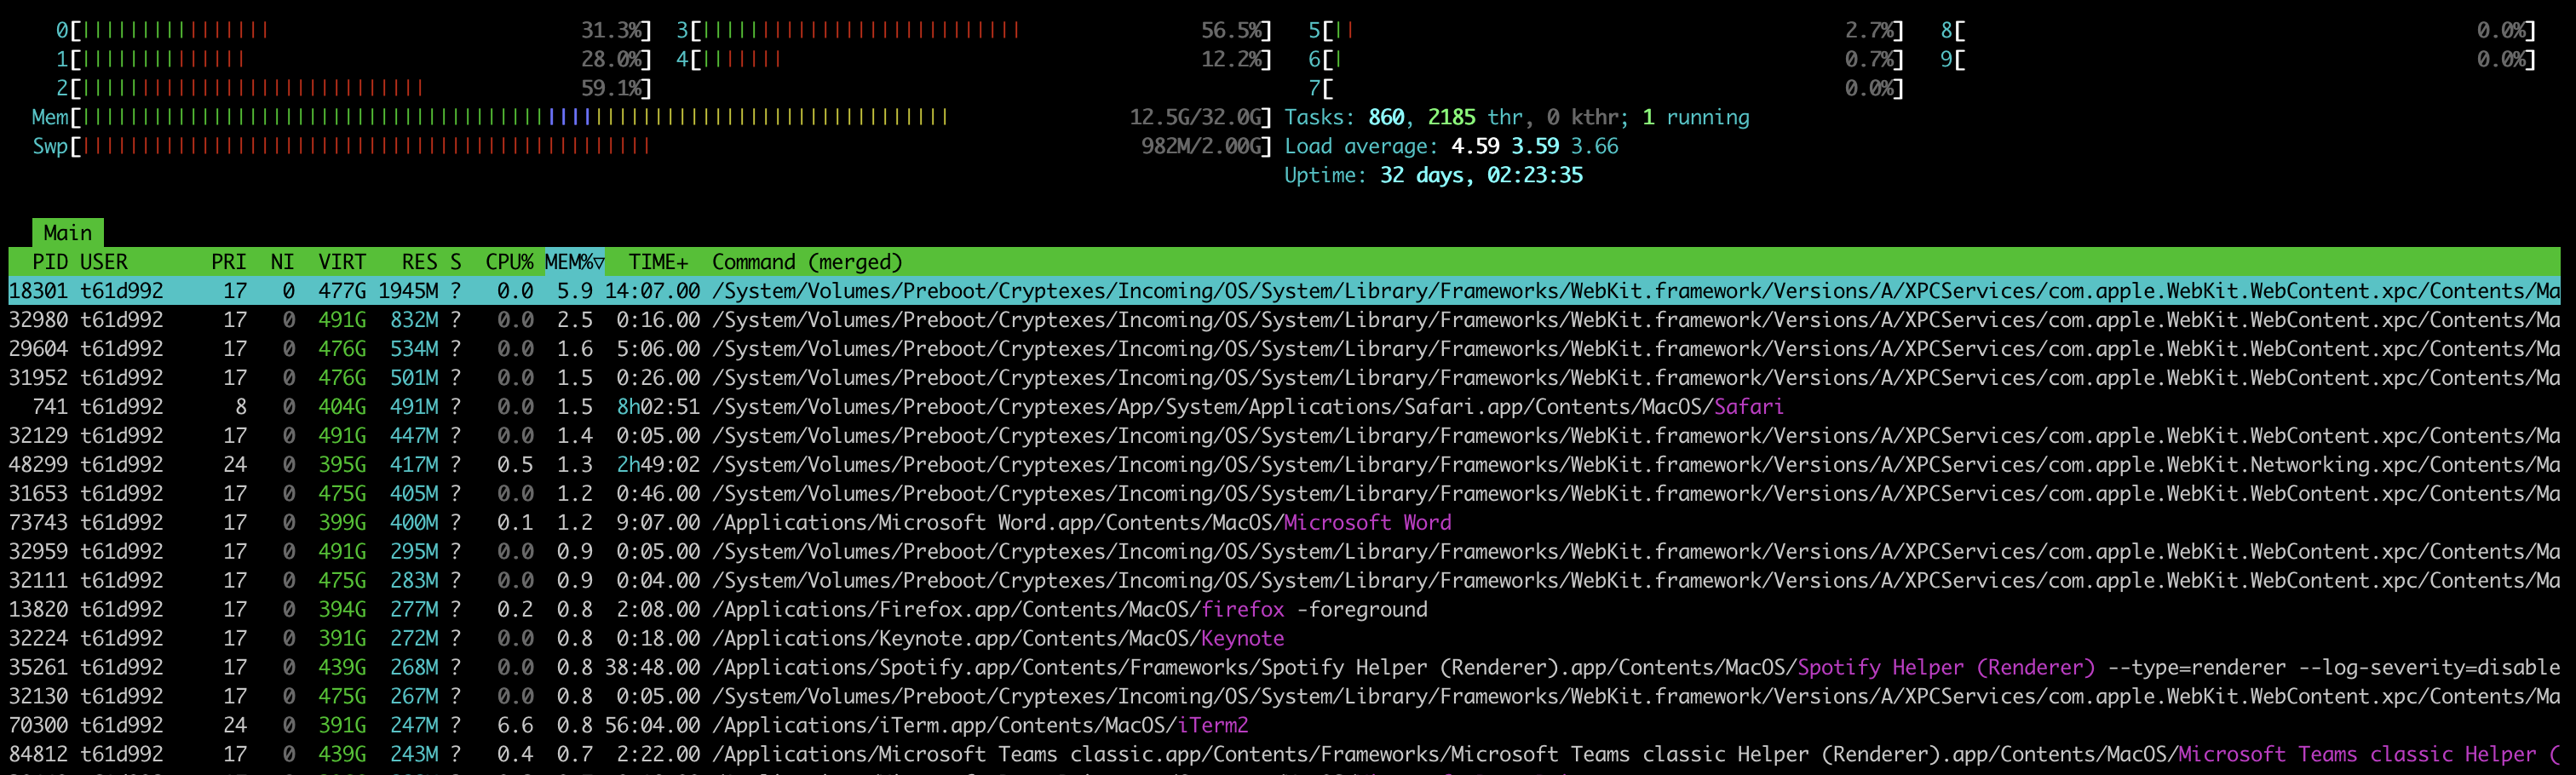

# Let's Dive Into the Unix Shell

- If you have a MAC, you already have it.
- If you have a PC, you may need to install it. See [here](https://youtu.be/339AEqk9c-8) for instructions.
- A Unix Shell (e.g. Bash) is where you can give your computer commands in `shell script ... .sh files` which runs Unix language.  

#### tl;dr Shell scripts tell your opperating systems what to do instead of using the Graphical User Interface (GUI)


# Now Let's Install Mini Conda

- Go here: [https://docs.conda.io/projects/miniconda/en/latest/](https://docs.conda.io/projects/miniconda/en/latest/) and install either the Mac or the Windows version.
- While your computer likely already has a version of Python installed, we'll be using Mini Conda to help us keep track of Python for us.
- Mini Conda is a **package manager** ... it keeps track of other code bases so you don't have to.